## 1. Set up

### 1 - Drive

1 - Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


2 - Move to the data folder

In [ ]:
cd "gdrive/MyDrive/Projects/1 - Numericals/Autism Prediction Challenge/2 - Production/data"

/content/gdrive/MyDrive/Projects/1 - Numericals/Autism Prediction Challenge/2 - Production/data


### 2. Libraries

In [ ]:
# Load data
import pandas as pd
import numpy as np
import io
import os
import glob

# Meta
import time

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.lines import Line2D

# Analysis
from scipy.stats import zscore

### 3. Data

1 - List file names

In [ ]:
ls

Autism-prediction/     l1_clean_encoded.csv   sample_submission.csv  train.csv
autism-prediction.zip  l1_clean_unecoded.csv  test.csv


In [ ]:
# Load sales_train in both encoded and unencoded forms

df_1 = pd.read_csv('l1_clean_encoded.csv')
df_2 = pd.read_csv('l1_clean_unecoded.csv')


## 2. Analysis

### 1. Look at the relationship between Class/ASD and final_score

In [ ]:
# Create a sample of 160 data points - 20% of the datad
df_s = df_1.sample(160)

In [ ]:
# Split data into rows with autism and without
df_autism = df_s[df_s['Class/ASD']==1]
df_no_autism = df_s[df_s['Class/ASD']==0]

In [ ]:
# Means of final_score for both dataframes
mean_autism = df_autism['final_score'].mean()
mean_no_autism = df_no_autism['final_score'].mean()
print('Mean of final_score for individuals with autism:',round(mean_autism,2))
print('Mean of final_score for individuals with no autism:',round(mean_no_autism,2))

Mean of final_score for individuals with autism: 10.07
Mean of final_score for individuals with no autism: 6.08


In [ ]:
# Create a bootstrap sample
bootsample = df_s.sample(160,replace=True)

# Split data into rows with autism and without from the bootstrap sample
df_b_autism = bootsample[bootsample['Class/ASD']==1]
df_b_no_autism = bootsample[bootsample['Class/ASD']==0]

# Means of final_score for both dataframes
mean_b_autism = df_b_autism['final_score'].mean()
mean_b_no_autism = df_b_no_autism['final_score'].mean()
print('Mean of final_score for individuals with autism:',round(mean_b_autism,2))
print('Mean of final_score for individuals with no autism:',round(mean_b_no_autism,2))

Mean of final_score for individuals with autism: 10.14
Mean of final_score for individuals with no autism: 5.67


In [ ]:
# Bootstrap
boot_autism_means = []
boot_no_autism_means = []

for _ in range(10000):
  bootsample = df_s.sample(160,replace=True)
  df_b_autism = bootsample[bootsample['Class/ASD']==1]
  df_b_no_autism = bootsample[bootsample['Class/ASD']==0]
  boot_autism_means.append(df_b_autism['final_score'].mean())
  boot_no_autism_means.append(df_b_no_autism['final_score'].mean())


(array([   6.,   22.,  127.,  698., 2071., 3180., 2645., 1043.,  191.,
          17.]),
 array([ 7.64676727,  8.07561698,  8.50446668,  8.93331638,  9.36216608,
         9.79101579, 10.21986549, 10.64871519, 11.07756489, 11.50641459,
        11.9352643 ]),
 <a list of 10 Patch objects>)

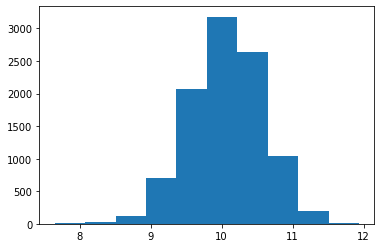

In [ ]:
# Distribution of means final_score in individuals with autism
plt.hist(boot_autism_means)

In [ ]:
# Cut off 2.5% from the front and rear of the histograms to get the confidence interval range
np.percentile(boot_autism_means, 2.5), np.percentile(boot_autism_means, 97.5)

(9.0432453075028, 11.038400151777003)

(array([9.000e+00, 1.960e+02, 9.760e+02, 2.716e+03, 3.524e+03, 1.998e+03,
        5.310e+02, 4.700e+01, 2.000e+00, 1.000e+00]),
 array([4.93032425, 5.19829715, 5.46627006, 5.73424296, 6.00221586,
        6.27018876, 6.53816167, 6.80613457, 7.07410747, 7.34208037,
        7.61005328]),
 <a list of 10 Patch objects>)

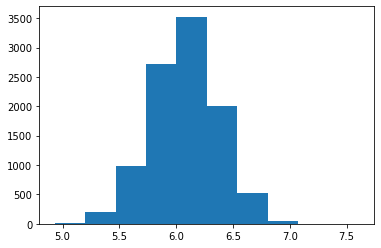

In [ ]:
# Distribution of means final_score in individuals without autism
plt.hist(boot_no_autism_means)

In [ ]:
# Cut off 2.5% from the front and rear of the histograms to get the confidence interval range
np.percentile(boot_no_autism_means, 2.5), np.percentile(boot_no_autism_means, 97.5)

(5.496620503221285, 6.637065419536847)

In [ ]:
# Check the population mean

df_autism = df_1[df_1['Class/ASD']==1]
df_no_autism = df_1[df_1['Class/ASD']==0]
print('Mean of final_score for individuals with autism:',round(mean_autism,2))
print('Mean of final_score for individuals with no autism:',round(mean_no_autism,2))

Mean of final_score for individuals with autism: 10.07
Mean of final_score for individuals with no autism: 6.08
